# Predicting House Prices - Kings County, WA
About this Dataset: It contains house sale prices for King County, WA. The houses were sold between May 2014 and May 2015. <br>
For further information to the various variables pleas see the Readme notebook.<br>
<br>
Import necessary pacages


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import statsmodels.api as sms
import statsmodels.formula.api as smf

%matplotlib inline

## Working with the Dataset
Reading the Dataset <br>
Change the '?' in the column __sqft_basement__ to nan's and into a numeric column. 

In [2]:
house = pd.read_csv('/Users/carlottaulm/nf-sep-20/cgn-2020-ds-Project-EDA/King_County_House_prices_dataset.csv')
pd.set_option("display.max_columns", None)
#convert column sqft_basement into float
house['sqft_basement'] = pd.to_numeric(house['sqft_basement'], errors='coerce')

In [3]:
#house.info()

### Remove outliers
with Z-score: 
* signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured.
* relationship with the Standard Deviation and Mean of the group of data points


In [4]:
z_scores = stats.zscore(house.price)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)
new_df = house[filtered_entries]
#house['price'] = house[filtered_entries]

z_scores = stats.zscore(new_df.sqft_living)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)
new_df1 = new_df[filtered_entries]
#house['sqft_living'] = house[filtered_entries]

z_scores = stats.zscore(new_df1.sqft_lot)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)
new_df2 = new_df1[filtered_entries]
#house['sqft_lot'] = house[filtered_entries]

z_scores = stats.zscore(new_df2.sqft_lot15)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)
new_df3 = new_df2[filtered_entries]
#house['sqft_lot15'] = house[filtered_entries]

z_scores = stats.zscore(new_df3.sqft_living15)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)
new_df4 = new_df3[filtered_entries]
#house['sqft_living15'] = house[filtered_entries]

z_scores = stats.zscore(new_df4.sqft_above)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)
new_df5 = new_df4[filtered_entries]
#house['sqft_above'] = house[filtered_entries]

#house = new_df5
#house.describe()
new_df5.describe().round(2)
df = new_df5

## Change some Variables

To disable SettingWithCopyWarning: 

In [6]:
pd.options.mode.chained_assignment = None 

### Bedroom
In the column __bedrooms__ is a house with 33 bedrooms, which seems, compared to the price and sqft living of <br>
the house, off. I assumed it to be a tipo and changed it to 3.


In [7]:
df.loc[15856, 'bedrooms'] = 3
df.loc[15856, 'bedrooms']

3

### Bathroom

In [8]:
df["bathrooms"] = df['bathrooms'].round(0).astype(int)

### Date
Change the column __Dates__ into a column __month and year__ to be able to compare it better with the price. <br>
Create new columns with only months and only year and then merge them into a new one <br>
Delete the unecessary columns

In [11]:
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month

del df['date']

df['month_year'] = pd.to_datetime(df.assign(day=1)[['year','month','day']]).dt.to_period('m')
del df['year']
del df['month']


### Remove nans from Waterfront
drop rows with nans

In [12]:
df = df[df['waterfront'].notna()]

In [13]:
df['waterfront'].isna().value_counts()

False    17855
Name: waterfront, dtype: int64

### Remove nans from basement

In [14]:
df = df[df['sqft_basement'].notna()]

In [15]:
df['sqft_basement'].isna().value_counts()

False    17469
Name: sqft_basement, dtype: int64

### Long/ Lat Groups, Bins
Create bins of the columns __long__ and __lat__ and create a new column __cord__ <br>
That allows me to compare the price according to different regions.  

In [16]:
step = 0.5
to_bin = lambda x: np.floor(x / step) * step
df["latbin"] = df.lat.map(to_bin)
df["lonbin"] = df.long.map(to_bin)
df["cord"] = df["latbin"].round(2).astype(str) + ';' + df["lonbin"].astype(str)

### Year Build into groups 
bin the column __yr_built__ into different decades.

In [17]:
df['yr_built_bins'] = pd.cut(x=df['yr_built'], bins=[1900, 1920, 1940, 1960, 1980, 2000, 2015])

### Renovated:

Only 659 houses were renovated <br> 4246 nan's <br> 15822 nor renovated <br> not enough data to make a observation conclusion 

In [18]:
df['yr_renovated'].value_counts(dropna = False)

0.0       13799
NaN        3103
2014.0       60
2013.0       28
2005.0       25
          ...  
1962.0        1
1951.0        1
1944.0        1
1971.0        1
1956.0        1
Name: yr_renovated, Length: 70, dtype: int64

### Price per squarefoot
Create a new column of the price per sqft <br> I use as sqft reference __sqft_living__

In [19]:
df['price_sqft'] = df['price'] / df['sqft_living']

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17469 entries, 1 to 21596
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype    
---  ------         --------------  -----    
 0   id             17469 non-null  int64    
 1   price          17469 non-null  float64  
 2   bedrooms       17469 non-null  int64    
 3   bathrooms      17469 non-null  int64    
 4   sqft_living    17469 non-null  int64    
 5   sqft_lot       17469 non-null  int64    
 6   floors         17469 non-null  float64  
 7   waterfront     17469 non-null  float64  
 8   view           17419 non-null  float64  
 9   condition      17469 non-null  int64    
 10  grade          17469 non-null  int64    
 11  sqft_above     17469 non-null  int64    
 12  sqft_basement  17469 non-null  float64  
 13  yr_built       17469 non-null  int64    
 14  yr_renovated   14366 non-null  float64  
 15  zipcode        17469 non-null  int64    
 16  lat            17469 non-null  float64  
 17  long        

### Price for each location

## Categorial variables
categorical variables generate vertical lines for discrete values

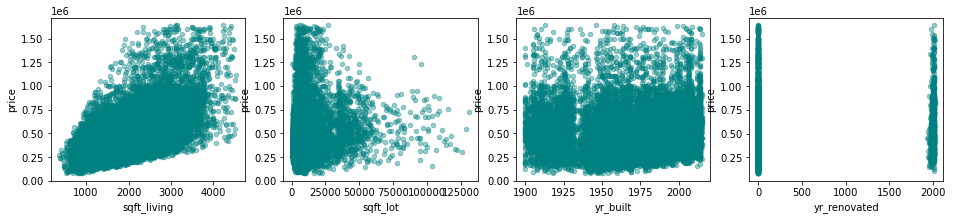

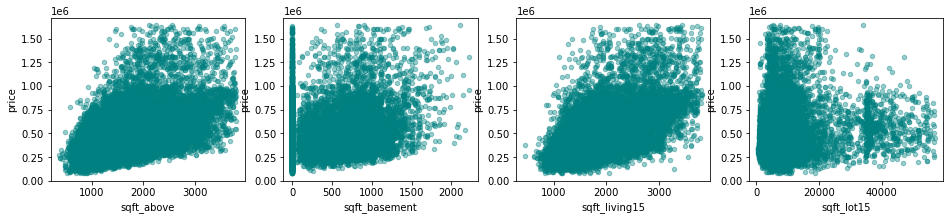

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['sqft_living', 'sqft_lot', 'yr_built', 'yr_renovated'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='teal')
    
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))    
    
for xcol, ax in zip(['sqft_above','sqft_basement','sqft_living15', 'sqft_lot15'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='teal')

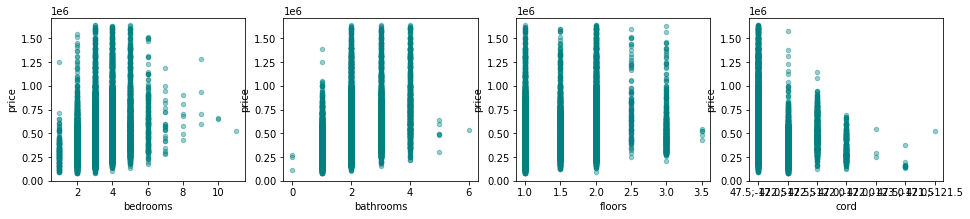

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip([ 'bedrooms', 'bathrooms', 'floors', 'cord'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='teal')

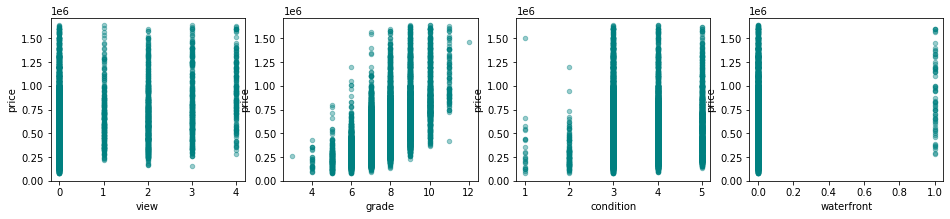

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip([ 'view', 'grade', 'condition', 'waterfront'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='teal')

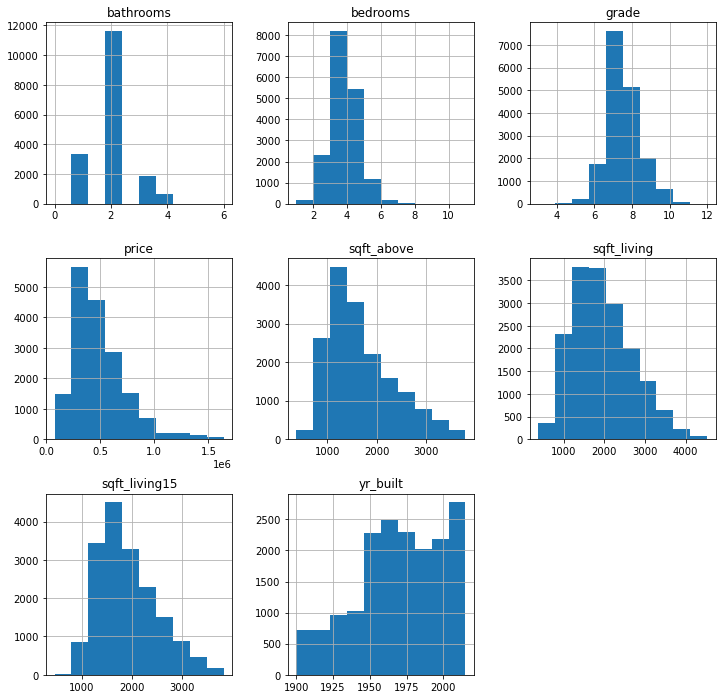

In [24]:
columns = ['sqft_above', 'sqft_living15', 'yr_built', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'grade']
df[columns].hist(figsize=(12,12));

## Create dummy variables 
to be able to use the categorial variables in the regression model, I am going to transform these variables <br>
into dummie variables. <br>
Following variables are going to be transformed: 

* __Condition__ <br>
5 best/ 1 worst; Relative to age and grade
* __year built__
* __Grade__ <br>
Categories grade: 11 (1 to 13) - higher grade = better quality <br>
Represents the construction quality of improvements 
* __View__ 
* __Zipcodes__
* __Cord__

In [27]:
#df = df.merge(pd.get_dummies(df.floors, drop_first=True, prefix='fl'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.condition, drop_first=True, prefix='cond'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.grade, drop_first=True, prefix='gr'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.cord, drop_first=True, prefix='cord'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.yr_built_bins, drop_first=True, prefix='built'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.zipcode, drop_first=True, prefix='zip'), left_index=True, right_index=True)

## Correlation
Check the correlation between variables. 


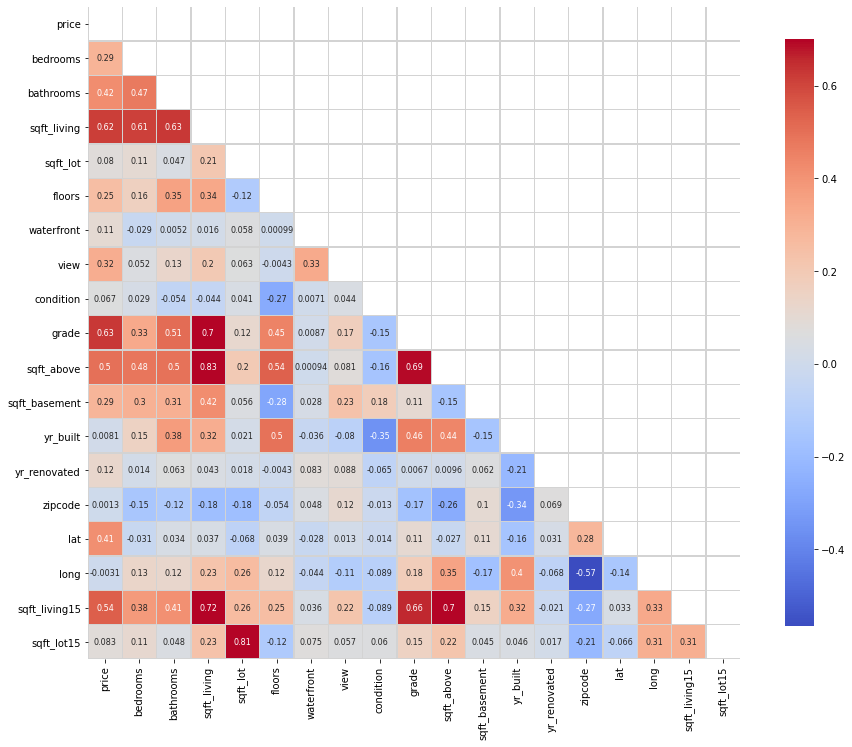

In [30]:
x = ['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront',
            'view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated',
            'zipcode','lat','long','sqft_living15','sqft_lot15']

mask = np.zeros_like(df[x].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))

sns.heatmap(df[x].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="coolwarm", #"BuGn_r" to reverse 
            linecolor='lightgrey',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});

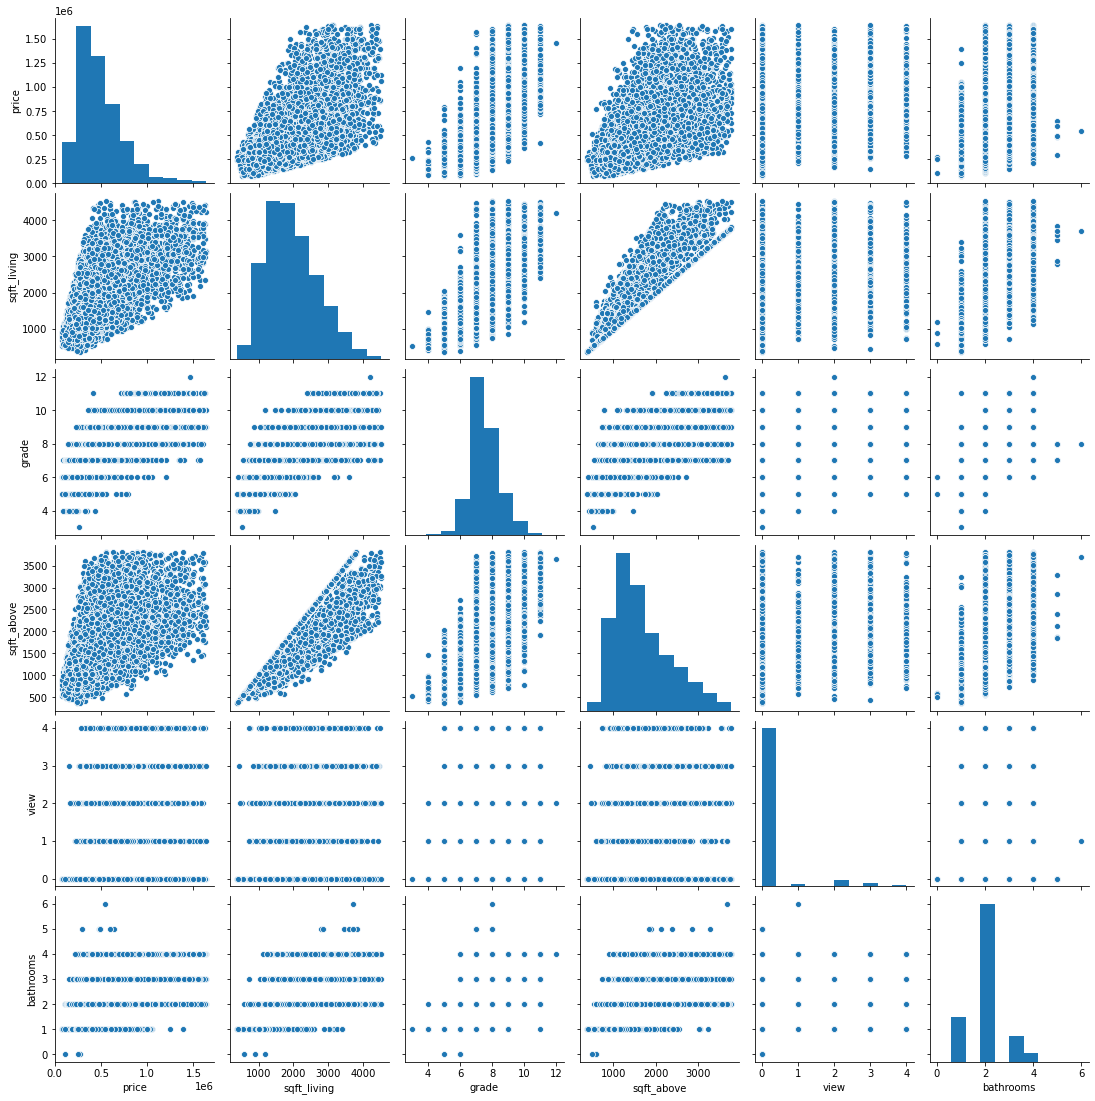

In [31]:
#sns.set()
cols = ['price', 'sqft_living', 'grade', 'sqft_above', 'view', 'bathrooms']
sns.pairplot(df[cols], height = 2.5)
plt.show();

## EDA

### House market segment per price

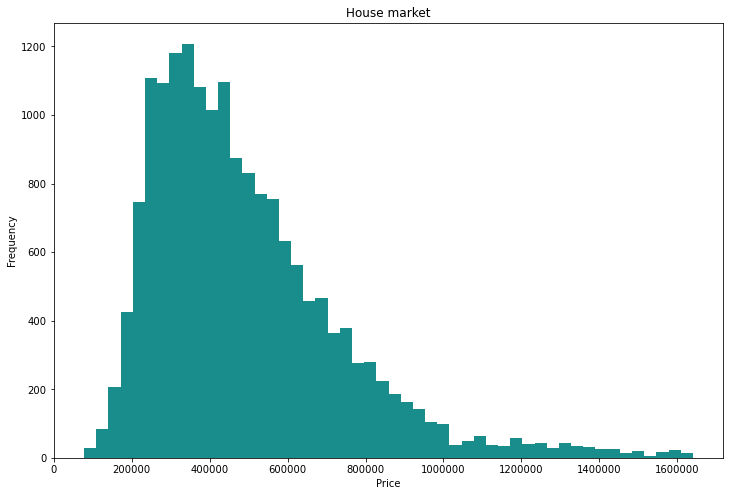

In [32]:
plt.figure(figsize=(12,8))

a = sns.distplot(df['price'], kde = False, color = 'teal', hist_kws={'alpha': 0.9});
#a.grid(True)
a.set_title('House market')
a.set_ylabel('Frequency')
a.set_xlabel('Price')
a.ticklabel_format(style='plain', axis='x')
a;

plt.savefig('/Users/carlottaulm/nf-sep-20/cgn-2020-ds-Project-EDA/House_market')

### Relationship between Price and sqft_living

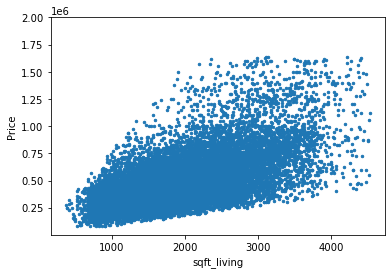

In [33]:
df.plot(x='sqft_living', 
          y='price', 
          kind='scatter', ylim=(3,2000000), s=6);
plt.ylabel('Price')
plt.xlabel('sqft_living')
plt.savefig('/Users/carlottaulm/nf-sep-20/cgn-2020-ds-Project-EDA/price_sqft_living')

### Relationship Price and Bathrooms / Bedrooms
up until 4 bathrooms the price rises. only 69 houses have more than 4 bathrooms.

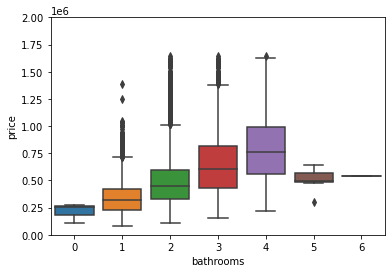

In [34]:
fig = sns.boxplot(x='bathrooms', y="price", data=df)
fig.axis(ymin=0, ymax=2000000);
plt.savefig('/Users/carlottaulm/nf-sep-20/cgn-2020-ds-Project-EDA/price_bathrooms')

In [35]:
df['bathrooms'].value_counts()

2    11614
1     3340
3     1872
4      633
5        6
0        3
6        1
Name: bathrooms, dtype: int64

In [36]:
df['bedrooms'].value_counts()

3     8184
4     5424
2     2319
5     1160
6      181
1      163
7       24
8        7
9        4
10       2
11       1
Name: bedrooms, dtype: int64

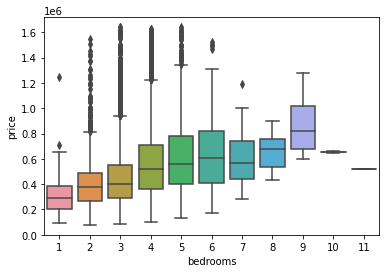

In [37]:
fig = sns.boxplot(x='bedrooms', y="price", data=df)
plt.savefig('/Users/carlottaulm/nf-sep-20/cgn-2020-ds-Project-EDA/price_bedrooms')

### Bathroom vs Bedroom

In [38]:
#Clearly view of bathrooms and bedrooms correlation


bath = ['bathrooms', 'bedrooms']
cm = sns.light_palette("teal", as_cmap=True)
pd.crosstab(df[bath[0]], df[bath[1]]).style.background_gradient(cmap = cm)

bedrooms,1,2,3,4,5,6,7,8,9,10,11
bathrooms,,,,,,,,,,,
0,1,2,0,0,0,0,0,0,0,0,0
1,142,1348,1534,278,33,4,1,0,0,0,0
2,20,940,6030,3962,583,71,6,1,0,1,0
3,0,28,497,887,384,64,5,3,2,1,1
4,0,1,123,296,159,39,11,2,2,0,0
5,0,0,0,1,1,3,0,1,0,0,0
6,0,0,0,0,0,0,1,0,0,0,0


In [39]:
bath_cond = ['bedrooms', 'condition']
cm = sns.light_palette("teal", as_cmap=True)
pd.crosstab(df[bath_cond[0]], df[bath_cond[1]]).style.background_gradient(cmap = cm)

condition,1,2,3,4,5
bedrooms,,,,,
1,3,8,100,42,10
2,10,40,1497,607,165
3,7,54,5235,2268,620
4,3,26,3570,1357,468
5,0,1,710,336,113
6,0,2,109,57,13
7,0,0,17,5,2
8,0,0,5,2,0
9,0,0,4,0,0


In [40]:
grade_bath = ['bedrooms', 'grade']
cm = sns.light_palette("teal", as_cmap=True)
pd.crosstab(df[grade_bath[0]], df[grade_bath[1]]).style.background_gradient(cmap = cm)

grade,3,4,5,6,7,8,9,10,11,12
bedrooms,,,,,,,,,,
1,1,10,36,65,40,10,1,0,0,0
2,0,14,86,700,1023,420,60,15,1,0
3,0,1,53,721,4197,2351,634,209,18,0
4,0,0,13,204,1844,1885,1079,343,55,1
5,0,0,4,35,415,398,223,78,7,0
6,0,0,3,5,72,68,25,6,2,0
7,0,0,0,1,10,9,4,0,0,0
8,0,0,0,0,4,3,0,0,0,0
9,0,0,0,0,3,1,0,0,0,0


### Floors and Price/sqft_living
only 711 houses have more than 2 floors

In [41]:
df['floors'].value_counts()

1.0    8950
2.0    6357
1.5    1545
3.0     507
2.5     105
3.5       5
Name: floors, dtype: int64

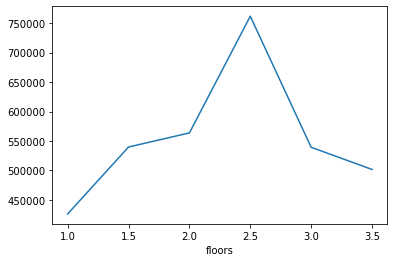

In [42]:
df.groupby(['floors'])['price'].mean().plot(kind='line');

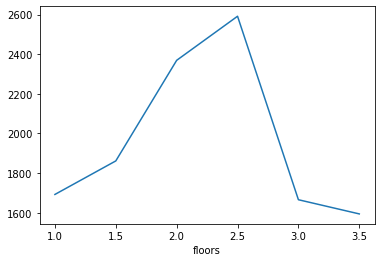

In [43]:
df.groupby(['floors'])['sqft_living'].mean().plot(kind='line');

### Average Sale price over time (in months)
Sold more between april and october. But 2014 and 2015 almost the same amount.

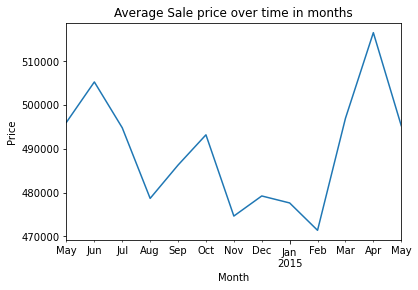

In [44]:
df.groupby(['month_year'])['price'].mean().plot(kind='line', title="Average Sale price over time in months");
plt.ylabel('Price')
plt.xlabel('Month')
plt.savefig('/Users/carlottaulm/nf-sep-20/cgn-2020-ds-Project-EDA/Average_price_over_time.png')

### Average Sale price per squarefoot over time

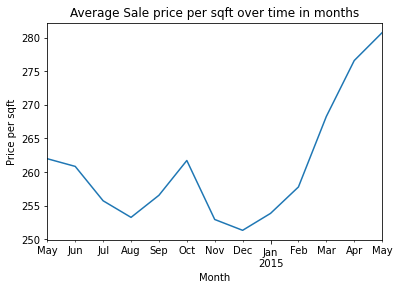

In [45]:
df.groupby(['month_year'])['price_sqft'].mean().plot(kind='line', title="Average Sale price per sqft over time in months");
plt.ylabel('Price per sqft')
plt.xlabel('Month')
plt.savefig('/Users/carlottaulm/nf-sep-20/cgn-2020-ds-Project-EDA/Average_price_persq_over_time')

### sqft_living and sqft_lot to the price

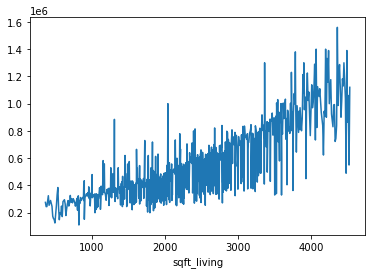

In [46]:
df.groupby(['sqft_living'])['price'].mean().plot(kind='line');


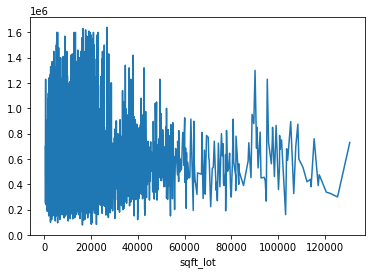

In [47]:
df.groupby(['sqft_lot'])['price'].mean().plot(kind='line');

### Year built and Price

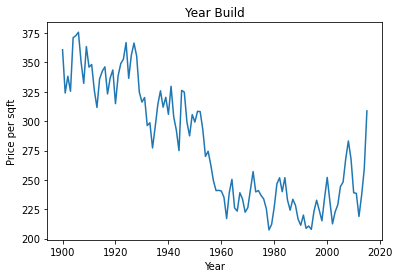

In [67]:
df.groupby(['yr_built'])['price_sqft'].mean().plot(kind='line', title="Year Build");
plt.ylabel('Price per sqft')
plt.xlabel('Year')
plt.ticklabel_format(style='plain', axis='y')
plt.savefig('/Users/carlottaulm/nf-sep-20/cgn-2020-ds-Project-EDA/Year_built_sqft')

### Waterfront

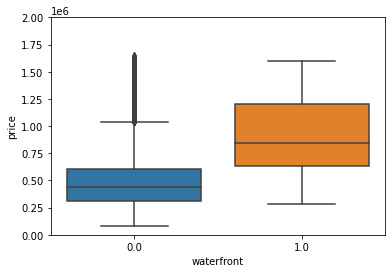

In [49]:
fig = sns.boxplot(x='waterfront', y="price", data=df)
fig.axis(ymin=0, ymax=2000000);
plt.savefig('/Users/carlottaulm/nf-sep-20/cgn-2020-ds-Project-EDA/Waterfront.png')

### View

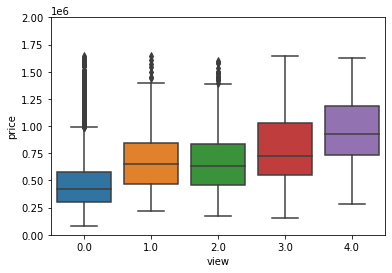

In [50]:
fig = sns.boxplot(x='view', y="price", data=df)
fig.axis(ymin=0, ymax=2000000);
plt.savefig('/Users/carlottaulm/nf-sep-20/cgn-2020-ds-Project-EDA/View.png')

### Location

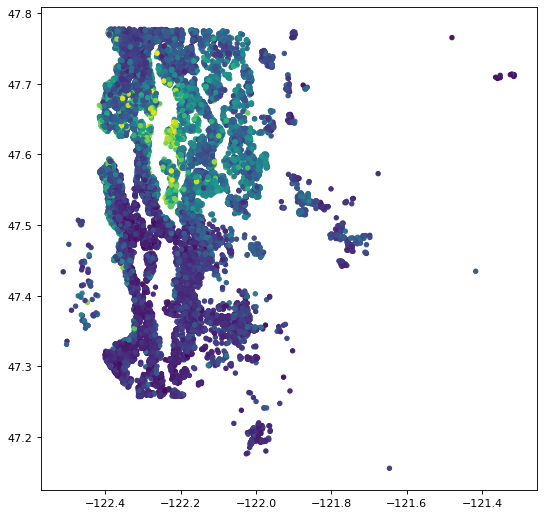

In [51]:
plt.figure(figsize=(8, 8), dpi=80)
plt.scatter(x=df['long'], y=df['lat'], c=df['price'], s=15);
plt.savefig('/Users/carlottaulm/nf-sep-20/cgn-2020-ds-Project-EDA/location.png')

### Neighborhood

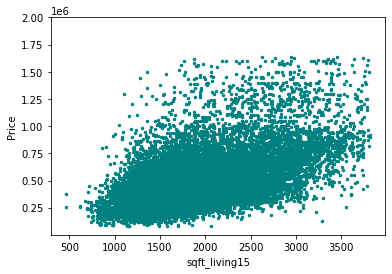

In [52]:
df.plot(x='sqft_living15', y='price', 
        kind='scatter', ylim=(3,2000000), s=6, color='teal');
plt.ylabel('Price')
plt.xlabel('sqft_living15')
plt.savefig('/Users/carlottaulm/nf-sep-20/cgn-2020-ds-Project-EDA/sqft_living15.png')

In [53]:
a = df.groupby('bedrooms').mean()['bathrooms'].round(1)
a

bedrooms
1     1.1
2     1.4
3     1.9
4     2.2
5     2.6
6     2.8
7     3.2
8     3.4
9     3.5
10    2.5
11    3.0
Name: bathrooms, dtype: float64

In [62]:
df.to_csv('King_County_Houses_EDA.csv')